In [2]:
%matplotlib inline
import sys
sys.path.insert(0, "..")
import dbutils
from cgmcore import utils
import matplotlib.pyplot as plt
import pandas as pd
import glob2
import os
import config
from tqdm import tqdm
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
from IPython.display import display, clear_output
import itertools
from tqdm import tqdm
import numpy as np


from matplotlib import pyplot as plt


Get the total number of all different types, available in the database. 

In [4]:
# Getting the models.
db_connector = dbutils.connect_to_main_database()

# get the number of rgb artifacts
select_sql_statement = "SELECT COUNT(*) FROM artifact WHERE type='rgb';"
count_rgb = db_connector.execute(select_sql_statement, fetch_all=True)[0][0]
print('Number of rgb images: ' + str(count_rgb))

# get the number of rgb artifacts
select_sql_statement = "SELECT COUNT(*) FROM artifact WHERE type='pcd';"
count_pcd = db_connector.execute(select_sql_statement, fetch_all=True)[0][0]
print('Numbers of point clouds (xyz): ' + str(count_pcd))

# get the number of the fused artifacts
select_sql_statement = "SELECT COUNT(*) FROM artifact WHERE type='pcrgb';"
count_fusion = db_connector.execute(select_sql_statement, fetch_all=True)[0][0]
print('Number of fused point clouds (xyzrgbcs): ' + str(count_fusion))







Number of rgb images: 743562
Numbers of point clouds (xyz): 223249
Number of fused point clouds (xyzrgbcs): 146488


In [15]:
db_connector = dbutils.connect_to_main_database()

# get the latest results of a network artifacts quality
#select_sql_statement = "SELECT mae FROM ("
select_sql_statement += " SELECT AVG(aq.value) FROM artifact_quality aq INNER JOIN artifact a ON a.id = aq.artifact_id WHERE aq.key='mae' AND aq.type='20191015-1725_464-116weight_v4'"
#select_sql_statement += " INNER JOIN artifact a ON a.id = aq.artifact_id"
#select_sql_statement += " INNER JOIN measure m ON m.id = a.measure_id"
#select_sql_statement += " WHERE aq.key='mae'"
#select_sql_statement += " AND aq.type='20191015-1725_464-116weight_v4'"
select_sql_statement += ";"
result = db_connector.execute(select_sql_statement, fetch_all=True)

print (result)

ProgrammingError: syntax error at or near ";"
LINE 1: ...SELECT AVG(aq.value) as v FROM artifact_quality aq; SELECT A...
                                                             ^


Plot the results as a bar graph. 

Text(0.5, 0, 'number of objects in Database')

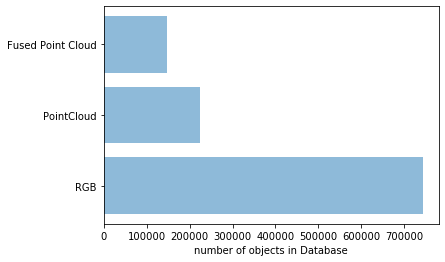

In [3]:
objects = ('RGB', 'PointCloud', 'Fused Point Cloud')
y_pos = np.arange(len(objects))
performance = [count_rgb, count_pcd, count_fusion]

plt.barh(y_pos, performance, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xticks(np.arange(0, count_rgb, step=100000))
plt.xlabel('number of objects in Database')


### Visualization

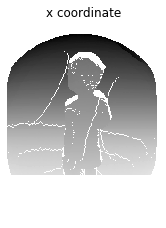

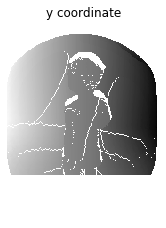

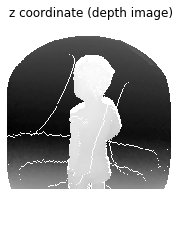

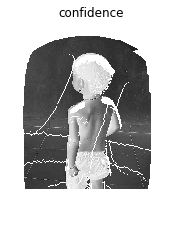

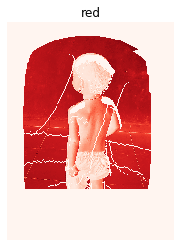

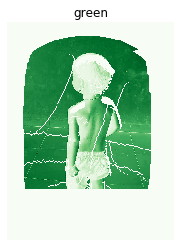

In [ ]:
from cgm_fusion import calibration
from cgm_fusion import fusion
from cgm_fusion import utility
import matplotlib.image as mpimg

import numpy

from enum import Enum, unique


colormap = 'binary' # inferno

plt.subplot(1, 2, 1)
viz = utility.get_viz_channel('/tmp/cloud_debug.ply', 0)
image = mpimg.imread("/tmp/depth_visualization.png")
plt.imshow(image, cmap=colormap)
plt.title('x coordinate')
plt.axis('off')
plt.show()

plt.subplot(1, 2, 2)
viz = utility.get_viz_channel('/tmp/cloud_debug.ply', 1)
image = mpimg.imread("/tmp/depth_visualization.png")
plt.imshow(image, cmap=colormap)
plt.title('y coordinate')
plt.axis('off')
plt.show()

viz = utility.get_viz_channel('/tmp/cloud_debug.ply', 2)
image = mpimg.imread("/tmp/depth_visualization.png")
plt.imshow(image, cmap=colormap)
plt.title('z coordinate (depth image)')
plt.axis('off')
plt.show()

viz = utility.get_viz_channel('/tmp/cloud_debug.ply', 3)
image = mpimg.imread("/tmp/depth_visualization.png")
plt.imshow(image, cmap=colormap)
plt.title('confidence')
plt.axis('off')
plt.show()

viz = utility.get_viz_channel('/tmp/cloud_debug.ply', 4)
image = mpimg.imread("/tmp/depth_visualization.png")
plt.imshow(image, cmap='Reds')
plt.title('red')
plt.axis('off')
plt.show()

viz = utility.get_viz_channel('/tmp/cloud_debug.ply', 5)
image = mpimg.imread("/tmp/depth_visualization.png")
plt.imshow(image, cmap='Greens')
plt.title('green')
plt.axis('off')
plt.show()

viz = utility.get_viz_channel('/tmp/cloud_debug.ply', 6)
image = mpimg.imread("/tmp/depth_visualization.png")
plt.imshow(image, cmap='Blues')
plt.title('blue')
plt.axis('off')
plt.show()

viz = utility.get_viz_channel('/tmp/cloud_debug.ply', 7)
image = mpimg.imread("/tmp/depth_visualization.png")
plt.imshow(image, cmap=colormap)
plt.title('segmentation')
plt.axis('off')
plt.show()

